In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import librosa
import librosa.display

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Time Domain

In [ ]:
# loading an example of locking file
lock_file = '/content/drive/MyDrive/Dataset/AudioSamples/150.wav'
ipd.Audio(lock_file)

In [ ]:
#unlocking
unlock_file = '/content/drive/MyDrive/Dataset/AudioSamples/111.wav'
ipd.Audio(unlock_file)

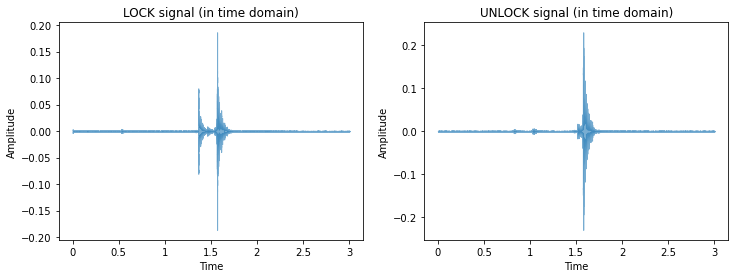

In [ ]:
#Time Domain representation
fig = plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
lock_signal, sr = librosa.load(lock_file, sr=22050)
librosa.display.waveshow(lock_signal, sr=sr,  alpha = 0.6)
plt.title("LOCK signal (in time domain)")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(1,2,2)
unlock_signal, sr = librosa.load(unlock_file, sr=22050)
librosa.display.waveshow(unlock_signal, sr=sr,  alpha = 0.6)
plt.title("UNLOCK signal (in time domain)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


In [ ]:
lock_signal

array([-0.00130998, -0.00201655, -0.00181094, ...,  0.00038626,
        0.00039942,  0.        ], dtype=float32)

FFT, STFT, Spectogram, Mel-spectogram, MFCC

In [ ]:
fft_lock = np.fft.fft(lock_signal)
fft_unlock  = np.fft.fft(unlock_signal)

In [ ]:
magnitude_lock = np.abs(fft_lock)
magnitude_unlock = np.abs(fft_unlock)

In [ ]:
magnitude_unlock[0]

3.0172212471322286

In [ ]:
frequency_lock = np.linspace(0, sr, len(magnitude_lock))
frequency_unlock = np.linspace(0, sr, len(magnitude_unlock))

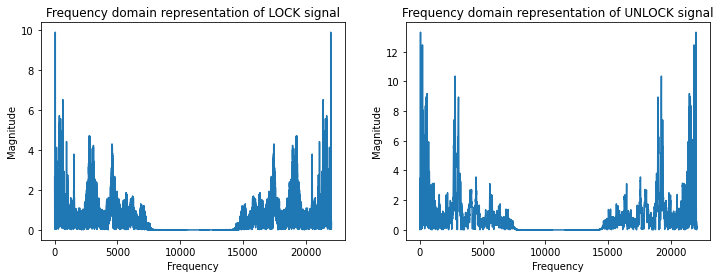

In [ ]:
#Plotting the fft
figure = plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(frequency_lock, magnitude_lock)
plt.title("Frequency domain representation of LOCK signal")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.subplot(1,2,2)
plt.plot(frequency_unlock, magnitude_unlock)
plt.title("Frequency domain representation of UNLOCK signal")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.show()

In [ ]:
half_magnitude_lock = magnitude_lock[:int(len(frequency_lock)/2)]
half_magnitude_unlock = magnitude_unlock[:int(len(frequency_unlock)/2)]

half_frequency_lock = frequency_lock[:int(len(frequency_lock)/2)]
half_frequency_unlock = frequency_unlock[:int(len(frequency_unlock)/2)]

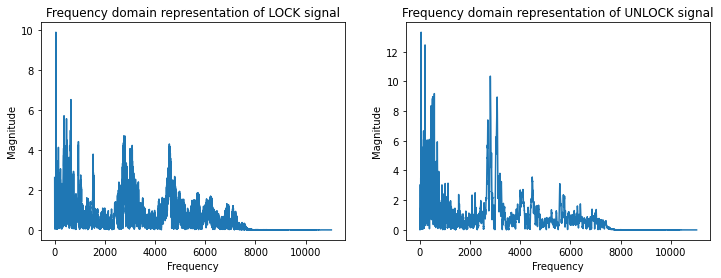

In [ ]:
#Plotting the first half of fft due to redundancies
figure = plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(half_frequency_lock, half_magnitude_lock)
plt.title("Frequency domain representation of LOCK signal")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.subplot(1,2,2)
plt.plot(half_frequency_unlock, half_magnitude_unlock)
plt.title("Frequency domain representation of UNLOCK signal")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.show()

In [ ]:
# Short-time fourier transform

n_fft = 2048 #number of samples per fft
hop_length = 512 #amount we are shifting each fourier transform to the right

lock_stft = librosa.core.stft(lock_signal, n_fft=n_fft, hop_length=hop_length)
unlock_stft = librosa.core.stft(unlock_signal, n_fft=n_fft, hop_length=hop_length)

#defining the spectogram
lock_spectogram = np.abs(lock_stft)
unlock_spectogram = np.abs(unlock_stft)

In [ ]:
unlock_stft

array([[-1.2721679e-01+0.0000000e+00j, -7.4472345e-02+0.0000000e+00j,
        -1.6213497e-02+0.0000000e+00j, ...,
        -7.2824143e-02+0.0000000e+00j, -2.5310816e-02+0.0000000e+00j,
         3.2734495e-02+0.0000000e+00j],
       [ 6.0712695e-02+7.9959910e-19j,  6.1609983e-02+5.0626133e-02j,
        -3.4807205e-02+1.4531118e-04j, ...,
         5.5902760e-02+3.0887179e-02j,  1.1121857e-02+1.3132367e-02j,
        -4.0520176e-02+4.2828273e-02j],
       [ 2.3865679e-02+1.7763443e-18j, -5.4020826e-02-3.3724263e-02j,
         8.3019935e-02-3.3314506e-04j, ...,
        -4.1074682e-02-2.0145185e-02j,  4.4926006e-02+4.7921993e-02j,
         1.7672421e-02-1.3036823e-01j],
       ...,
       [-4.1107874e-04-7.1924709e-19j,  2.0582222e-04+1.4765844e-07j,
        -1.7661851e-07-5.2184384e-07j, ...,
         1.8156783e-07+6.3765979e-09j, -2.6657992e-05-6.6250926e-05j,
         1.1091131e-04+2.7297714e-04j],
       [ 4.1101081e-04+2.5749802e-19j, -2.1537411e-07-2.0530984e-04j,
         6.3016410e-07

In [ ]:
unlock_spectogram

array([[1.2721679e-01, 7.4472345e-02, 1.6213497e-02, ..., 7.2824143e-02,
        2.5310816e-02, 3.2734495e-02],
       [6.0712695e-02, 7.9742052e-02, 3.4807507e-02, ..., 6.3868120e-02,
        1.7209148e-02, 5.8958847e-02],
       [2.3865679e-02, 6.3683398e-02, 8.3020605e-02, ..., 4.5748860e-02,
        6.5687619e-02, 1.3156059e-01],
       ...,
       [4.1107874e-04, 2.0582227e-04, 5.5092204e-07, ..., 1.8167977e-07,
        7.1413124e-05, 2.9464866e-04],
       [4.1101081e-04, 2.0530996e-04, 8.8193963e-07, ..., 4.9934511e-07,
        7.0616632e-05, 2.9394205e-04],
       [4.1083386e-04, 2.0554871e-04, 8.5353741e-07, ..., 6.0778700e-07,
        7.1119561e-05, 2.9373774e-04]], dtype=float32)

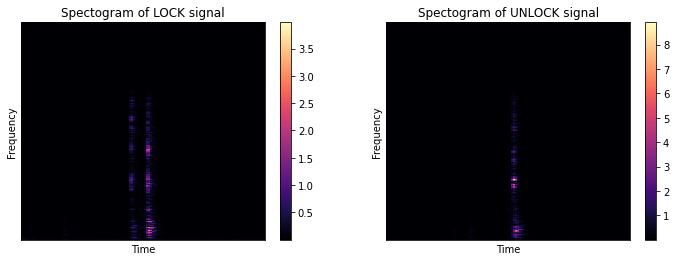

In [ ]:
# plotting the spectogram
figure = plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
librosa.display.specshow(lock_spectogram, sr=sr, hop_length=hop_length, cmap='magma')
plt.title("Spectogram of LOCK signal")
plt.ylabel("Frequency")
plt.xlabel("Time")
plt.colorbar()

plt.subplot(1,2,2)
librosa.display.specshow(unlock_spectogram, sr=sr, hop_length=hop_length, cmap='magma')
plt.title("Spectogram of UNLOCK signal")
plt.ylabel("Frequency")
plt.xlabel("Time")
plt.colorbar()

plt.show()

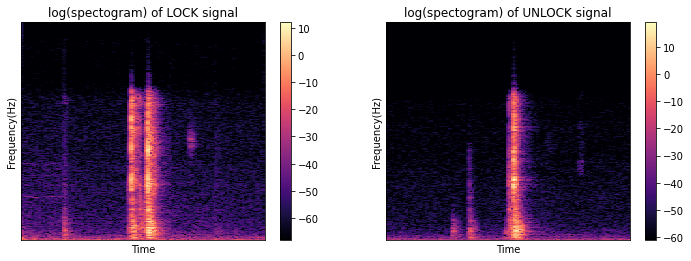

In [ ]:
#plotting the log(spectrogram) 
figure = plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
log_spectogram_1 = librosa.amplitude_to_db(lock_spectogram)
librosa.display.specshow(log_spectogram_1, sr=sr, hop_length=hop_length, cmap='magma')
plt.title("log(spectogram) of LOCK signal")
plt.ylabel("Frequency(Hz)")
plt.xlabel("Time")
plt.colorbar()

plt.subplot(1,2,2)
log_spectogram_2 = librosa.amplitude_to_db(unlock_spectogram)
librosa.display.specshow(log_spectogram_2, sr=sr, hop_length=hop_length, cmap='magma')
plt.title("log(spectogram) of UNLOCK signal")
plt.ylabel("Frequency(Hz)")
plt.xlabel("Time")
plt.colorbar()

plt.show()

In [ ]:
# Mel-filter banks
mel_filters = librosa.filters.mel(n_fft = n_fft, sr=sr, n_mels = 13)

In [ ]:
mel_filters.shape #(n_mels, nyquist frequency/2 +1 [2048/2 +1 = 1025])

(13, 1025)

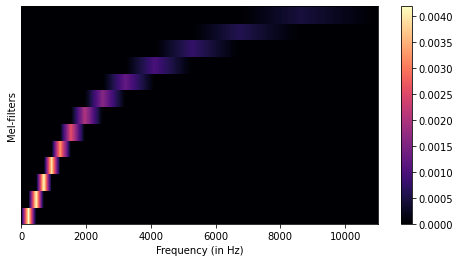

In [ ]:
plt.figure(figsize=(8,4))
librosa.display.specshow(mel_filters, sr=sr, x_axis='linear')
plt.xlabel("Frequency (in Hz)")
plt.ylabel("Mel-filters")
plt.colorbar()
plt.show()

In [ ]:
#defining the mel-spectogram

mel_spectogram_1 = librosa.feature.melspectrogram(lock_signal, sr=sr, n_fft=n_fft, hop_length=512, n_mels=13)
mel_spectogram_2 = librosa.feature.melspectrogram(unlock_signal, sr=sr, n_fft=n_fft, hop_length=512, n_mels=13)

In [ ]:
mel_spectogram_2.shape #(n_mels, no of frames)

(13, 130)

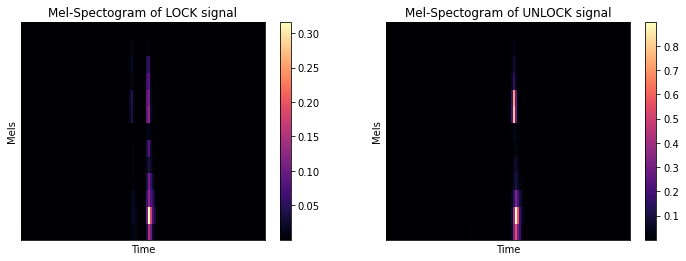

In [ ]:
# plotting the mel-spectogram

figure = plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
librosa.display.specshow(mel_spectogram_1, sr=sr, hop_length=hop_length, cmap='magma')
plt.title("Mel-Spectogram of LOCK signal")
plt.xlabel("Time")
plt.ylabel("Mels")
plt.colorbar()

plt.subplot(1,2,2)
librosa.display.specshow(mel_spectogram_2, sr=sr, hop_length=hop_length, cmap='magma')
plt.title("Mel-Spectogram of UNLOCK signal")
plt.xlabel("Time")
plt.ylabel("Mels")
plt.colorbar()

plt.show()

In [ ]:
#defining the log(mel-spectogram)
log_mel_spectogram_1 = librosa.power_to_db(mel_spectogram_1)
log_mel_spectogram_2 = librosa.power_to_db(mel_spectogram_2)

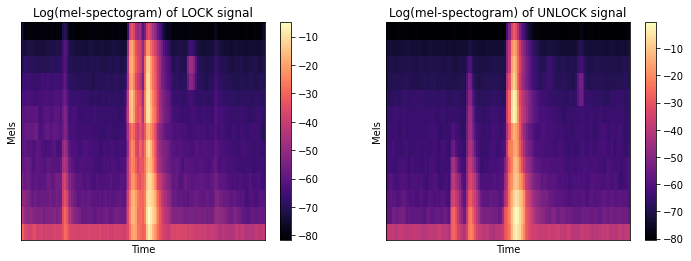

In [ ]:
# plotting the log(mel-spectogram)

figure = plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
librosa.display.specshow(log_mel_spectogram_1, sr=sr, hop_length=hop_length, cmap='magma')
plt.title("Log(mel-spectogram) of LOCK signal")
plt.xlabel("Time")
plt.ylabel("Mels")
plt.colorbar()

plt.subplot(1,2,2)
librosa.display.specshow(log_mel_spectogram_2, sr=sr, hop_length=hop_length, cmap='magma')
plt.title("Log(mel-spectogram) of UNLOCK signal")
plt.xlabel("Time")
plt.ylabel("Mels")
plt.colorbar()

plt.show()

In [ ]:
#MFCC
lock_mfcc = librosa.feature.mfcc(lock_signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
unlock_mfcc = librosa.feature.mfcc(unlock_signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

In [ ]:
lock_mfcc.shape

(13, 130)

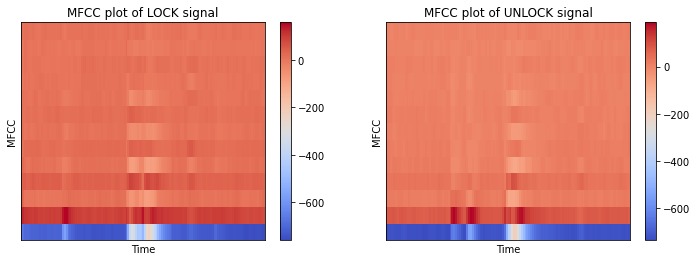

In [ ]:
#plotting the mfcc
figure = plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
librosa.display.specshow(lock_mfcc, sr=sr, hop_length=hop_length)
plt.title("MFCC plot of LOCK signal")
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()

plt.subplot(1,2,2)
librosa.display.specshow(unlock_mfcc, sr=sr, hop_length=hop_length)
plt.title("MFCC plot of UNLOCK signal")
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()

plt.show()


Root Mean Square Energy

In [ ]:
FRAME_LENGTH = 1024
HOP_LENGTH = 512

rms_lock = librosa.feature.rms(lock_signal, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
rms_unlock = librosa.feature.rms(unlock_signal, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

In [ ]:
rms_lock_2 = librosa.feature.rms(log_spectogram_1, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
rms_unlock_2 = librosa.feature.rms(log_spectogram_2, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

In [ ]:
log_spectogram_1.shape

(1025, 130)

Text(556.2954545454544, 0.5, 'Amplitude')

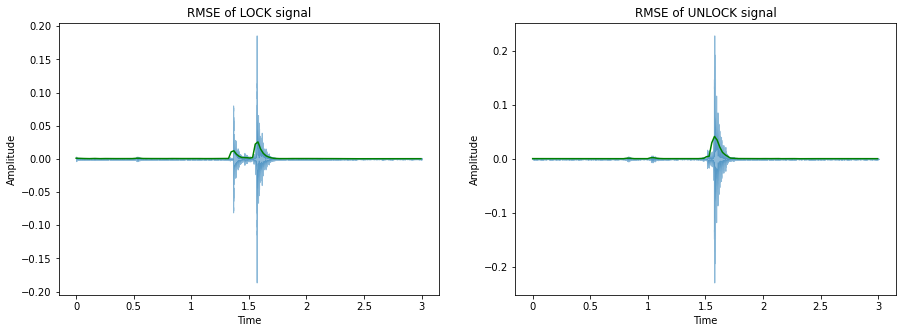

In [ ]:
frames = range(len(rms_lock))
t = librosa.frames_to_time(frames, hop_length = HOP_LENGTH)

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
librosa.display.waveshow(lock_signal, sr=sr, alpha = 0.5)
plt.plot(t, rms_lock, color='g')
plt.title("RMSE of LOCK signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")

#plt.figure(figsize = (12,15))
plt.subplot(1,2,2)
librosa.display.waveshow(unlock_signal, sr=sr, alpha = 0.5)
plt.plot(t, rms_unlock, color='g')
plt.title("RMSE of UNLOCK signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")

Text(559.5454545454544, 0.5, 'Log')

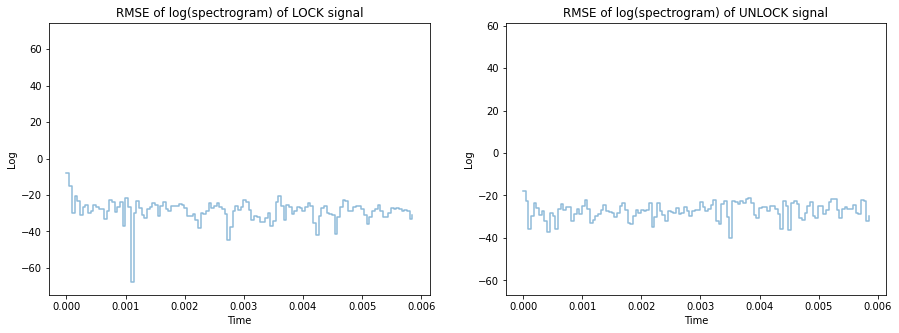

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
librosa.display.waveshow(log_spectogram_1, sr=sr, alpha = 0.5)
plt.plot(rms_unlock_2, color='g')
plt.title("RMSE of log(spectrogram) of LOCK signal")
plt.xlabel("Time")
plt.ylabel("Log")

#plt.figure(figsize = (12,15))
plt.subplot(1,2,2)
librosa.display.waveshow(log_spectogram_2, sr=sr, alpha = 0.5)
plt.plot(rms_unlock_2, color='g')
plt.title("RMSE of log(spectrogram) of UNLOCK signal")
plt.xlabel("Time")
plt.ylabel("Log")

In [ ]:
def root_mean_square(audio_signal, frame_length, hop_length):
  root_mean_square = []

  #rms for each frame
  for n in range(0, len(audio_signal), hop_length):
    exist_frame = np.sqrt(np.sum(audio_signal[n:n+frame_length]**2) /frame_length)
    root_mean_square.append(exist_frame)

  return np.array(root_mean_square)

In [ ]:
rms_lock_1 = root_mean_square(lock_signal, frame_length = FRAME_LENGTH, hop_length=HOP_LENGTH)
rms_unlock_1 = root_mean_square(unlock_signal, frame_length = FRAME_LENGTH, hop_length=HOP_LENGTH)

In [ ]:
rms_lock_1.shape

(130,)

Text(556.2954545454544, 0.5, 'Amplitude')

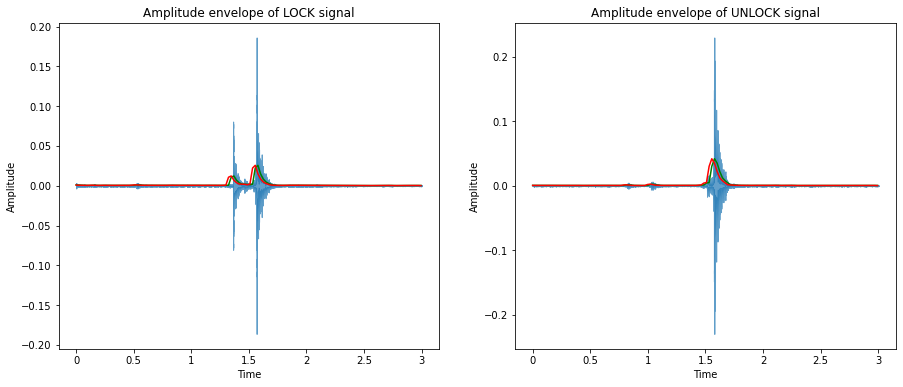

In [ ]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
librosa.display.waveshow(lock_signal, sr=sr, alpha = 0.7)
plt.plot(t, rms_lock, color='g')
plt.plot(t, rms_lock_1, color='r')
plt.title("Amplitude envelope of LOCK signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")

#plt.figure(figsize = (12,15))
plt.subplot(1,2,2)
librosa.display.waveshow(unlock_signal, sr=sr, alpha = 0.7)
plt.plot(t, rms_unlock, color='g')
plt.plot(t, rms_unlock_1, color='r')
plt.title("Amplitude envelope of UNLOCK signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")

**Amplitude envelope**

In [ ]:
# calculating the amplitude envelope for locking
#FRAME_SIZE = 512  # if we double this (=1024) then frame size halves (=65)
#def amplitude_envelope(audio_signal, frame_size):
  #amplitude_envelope = []
  #considering one frame at a time
  #for m in range(0, len(audio_signal), frame_size):
    #current_frame = max(audio_signal[m:m+frame_size])
    #amplitude_envelope.append(current_frame)
  #return np.array(amplitude_envelope)


# calculating the amplitude envelope for locking
FRAME_SIZE = 1024  # if we double this (=1024) then frame size halves (=65)
HOP_LENGTH = 512
def amplitude_envelope(audio_signal, frame_size, hop_length):
  amplitude_envelope = []
  #considering one frame at a time
  for m in range(0, len(audio_signal), hop_length):
    current_frame = max(audio_signal[m:m+frame_size])
    amplitude_envelope.append(current_frame)
  return np.array(amplitude_envelope)

# simplified amplitude envelope
#def ae(audio_signal, frame_size, hop_length)

In [ ]:
envelope_locking = amplitude_envelope(lock_signal, FRAME_SIZE, HOP_LENGTH)
len(envelope_locking)

130

In [ ]:
envelope_unlocking = amplitude_envelope(unlock_signal, FRAME_SIZE, HOP_LENGTH)
len(envelope_unlocking)

130

In [ ]:
envelope_locking

array([0.00123665, 0.00114051, 0.00086155, 0.00087555, 0.00093272,
       0.00138113, 0.00138249, 0.00138249, 0.00082061, 0.0010068 ,
       0.0010068 , 0.00079619, 0.00083199, 0.00083199, 0.00089059,
       0.00089059, 0.00106521, 0.00106521, 0.00088669, 0.00097071,
       0.00097071, 0.00337573, 0.00337573, 0.00225025, 0.00122745,
       0.00122999, 0.00122999, 0.00107616, 0.00092149, 0.00092149,
       0.00083307, 0.00083307, 0.00083183, 0.00093519, 0.00109064,
       0.00109064, 0.00097988, 0.00097988, 0.00096329, 0.00096329,
       0.00093786, 0.00093786, 0.00092166, 0.00084976, 0.00080658,
       0.00080658, 0.00080065, 0.00095726, 0.00095726, 0.00093252,
       0.00098309, 0.00098309, 0.00076904, 0.00068464, 0.00068464,
       0.0017692 , 0.00229331, 0.08062866, 0.08062866, 0.02790451,
       0.01575095, 0.00823068, 0.00823068, 0.00577036, 0.00375626,
       0.00744867, 0.18633579, 0.18633579, 0.04555234, 0.02971848,
       0.01578268, 0.01154523, 0.00674016, 0.00308755, 0.00180

Text(556.2954545454544, 0.5, 'Amplitude')

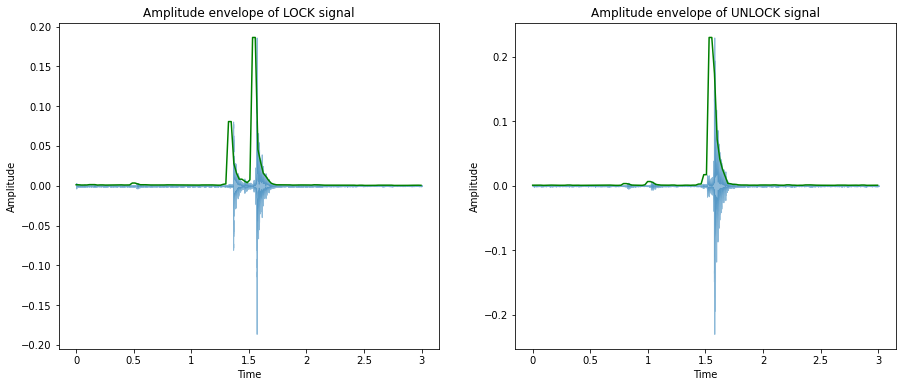

In [ ]:
# plotting and comparing the amplitude envelops for noise, locking and unlocking

frames = range(len(envelope_locking))
t = librosa.frames_to_time(frames, hop_length = HOP_LENGTH)

plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
librosa.display.waveshow(lock_signal, sr=sr, alpha = 0.5)
plt.plot(t, envelope_locking, color='g')
plt.title("Amplitude envelope of LOCK signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")

#plt.figure(figsize = (12,15))
plt.subplot(1,2,2)
librosa.display.waveshow(unlock_signal, sr=sr, alpha = 0.5)
plt.plot(t, envelope_unlocking, color='g')
plt.title("Amplitude envelope of UNLOCK signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")


**Spectral Centroid**


In [ ]:
lock_spectralcentroid = librosa.feature.spectral_centroid(y=lock_signal, n_fft= FRAME_SIZE, sr=sr, hop_length=HOP_LENGTH)[0]
unlock_spectralcentroid = librosa.feature.spectral_centroid(y=unlock_signal, n_fft= FRAME_SIZE, sr=sr, hop_length=HOP_LENGTH)[0]

In [ ]:
lock_spectralcentroid.shape

(130,)

In [ ]:
unlock_spectralcentroid.shape

(130,)

In [ ]:
frames = range(len(unlock_spectralcentroid))
time = librosa.frames_to_time(frames)

Text(0.5, 0, 'Time (in s)')

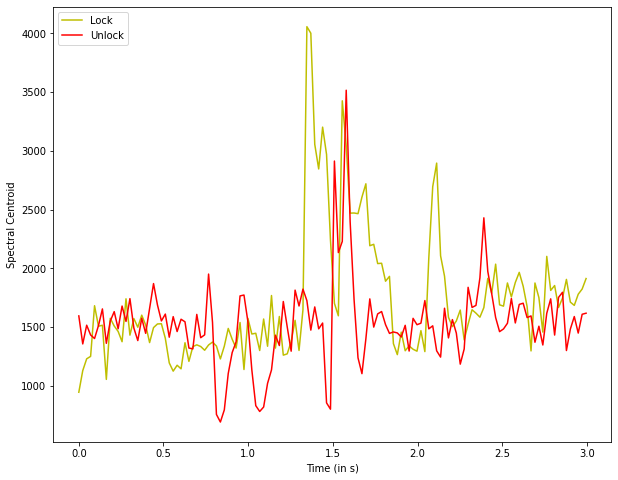

In [ ]:
# plotting the spectral centroid

fig = plt.figure(figsize = (10,8))

plt.plot(time, lock_spectralcentroid, color='y', label='Lock')
plt.plot(time, unlock_spectralcentroid, color='r', label='Unlock')
plt.legend(loc="upper left")
plt.ylabel("Spectral Centroid")
plt.xlabel("Time (in s)")

In [ ]:
lock_bandwidth = librosa.feature.spectral_bandwidth(y=lock_signal, n_fft= FRAME_SIZE, sr=sr, hop_length=HOP_LENGTH)[0]
unlock_bandwidth = librosa.feature.spectral_bandwidth(y=unlock_signal, n_fft= FRAME_SIZE, sr=sr, hop_length=HOP_LENGTH)[0]

In [ ]:
unlock_bandwidth.shape

(130,)

Text(0.5, 0, 'Time (in s)')

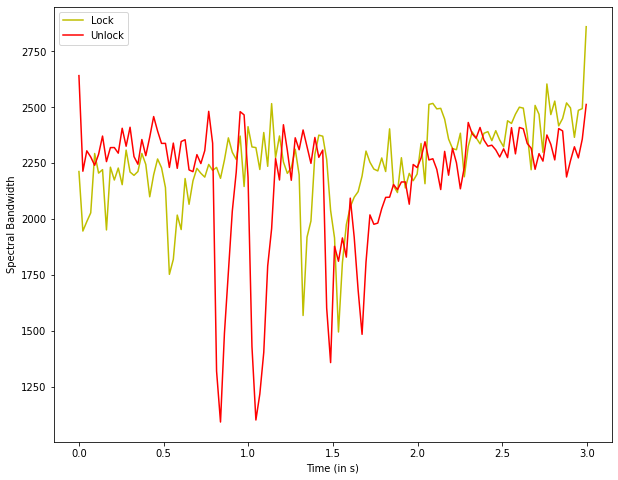

In [ ]:
# plotting the spectral bandwidth

fig = plt.figure(figsize = (10,8))

plt.plot(time, lock_bandwidth, color='y', label='Lock')
plt.plot(time, unlock_bandwidth, color='r', label='Unlock')
plt.legend(loc="upper left")
plt.ylabel("Spectral Bandwidth")
plt.xlabel("Time (in s)")